In [4]:
from lifelines.datasets import load_dd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

data = load_dd()
data.head()
#data.shape
#data.describecribe()
#data.index
#data.values
data.iloc[12:18,10]

12    1
13    5
14    1
15    1
16    3
17    3
Name: duration, dtype: int64

In [5]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [6]:
T = data["duration"]
E = data["observed"]
#print(T)
#print(E)

In [7]:
kmf.fit(T,event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 1808 total observations, 340 right-censored observations>

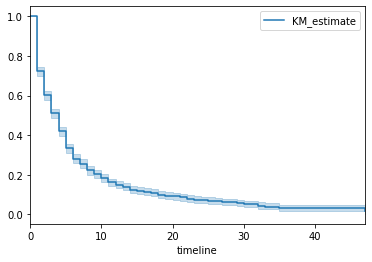

In [8]:
kmf.plot()

In [9]:
kmf.median_survival_time_

4.0

In [10]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)

12       1
13       5
14       1
15       1
16       3
17       3
18       4
26       1
27      11
28       4
31      13
32      10
33       5
34       9
36       4
38       3
42       1
43       2
47       6
48      10
49       2
50       1
51       3
52       2
53       2
54       4
55       1
56       1
57       1
58       1
        ..
1735     1
1736     1
1737     1
1738     1
1739     5
1740     1
1743     5
1744     5
1745     5
1746     5
1747     4
1749    11
1750     4
1751     3
1752     1
1753     2
1754     3
1755     4
1756     1
1757     2
1761     5
1762     5
1763     5
1764     5
1765     5
1766     5
1767     4
1768     1
1769     5
1770    10
Name: duration, Length: 1187, dtype: int64


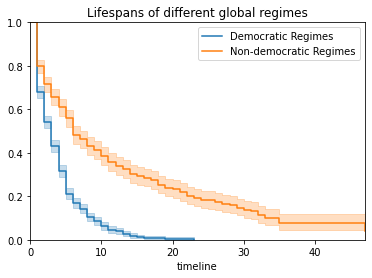

In [11]:
ax = plt.subplot(111)

dem = (data["democracy"] == "Democracy")
#print(dem)  #dem为条件data["democracy"] == "Democracy"返回的一列true或flase值
##dem.shape
print(T[dem])
#print(T[data["democracy"] == "Democracy"]) #从T中取出"民主分类为"Democracy"所对应的数据，T为已经从"duration"列取出的数据

kmf.fit(T[dem], event_observed=E[dem], label="Democratic Regimes")
kmf.plot(ax=ax)

kmf.fit(T[~dem], event_observed=E[~dem], label="Non-democratic Regimes")
kmf.plot(ax=ax)

plt.ylim(0, 1);
plt.title("Lifespans of different global regimes");